# Filtri

In questo notebook vediamo gli effetti che i filtri hanno sulle immagini. 

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import convolve


# Necessario per mostrare le figure nei notebooks
%matplotlib inline


img_src = './data/'

In [2]:
def img_show(image,**argv):
    plt.figure(figsize=(10,10))
    plt.imshow(image,**argv) # display the image
    plt.axis('off') 
    plt.show()


def img_info(image):
    print(image.shape, image.dtype, type(image)) 
    
    
def get_contrast(img):
    return np.max(img*255) - np.min(img*255)

def base_stats(img):
    return "Contrasto: {0:.0f} (valore massimo: {1:.0f}; valore minimo: {2:.0f})".format(get_contrast(img),np.max(img*255),np.min(img*255))


Definiamoci la funzione di convoluzione:

In [3]:
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    
    kernel_height, kernel_width = kernel.shape
    
    a = kernel_width//2
    b = kernel_height//2
    
    
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2*a, image.shape[1] + 2*b))
    image_padded[a:-a, b:-b] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+kernel_width, x: x+kernel_height]).sum()

    return output

Proviamo a vederla all'opera

Contrasto: 243 (valore massimo: 243; valore minimo: 0)


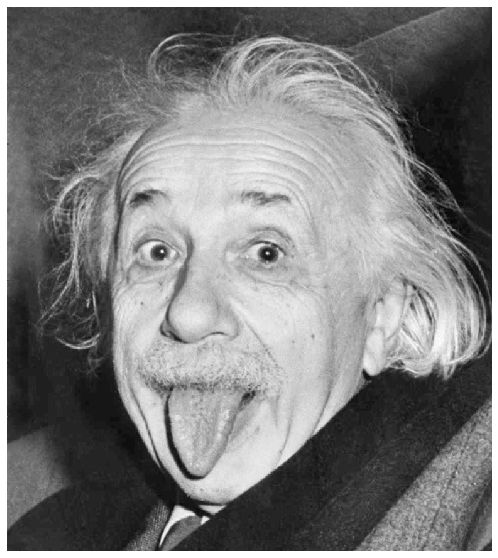

In [4]:
image = mp_image.imread(os.path.join(img_src,'einstein.png'))

image = image[:,:,0]

print(base_stats(image))
img_show(image,cmap=cm.gray)

Cominciamo con un filtro semplice: l'average filter, definito come
$$
k = \frac{1}{9}
\left[
\begin{array}{ccc}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{array}
\right]
$$

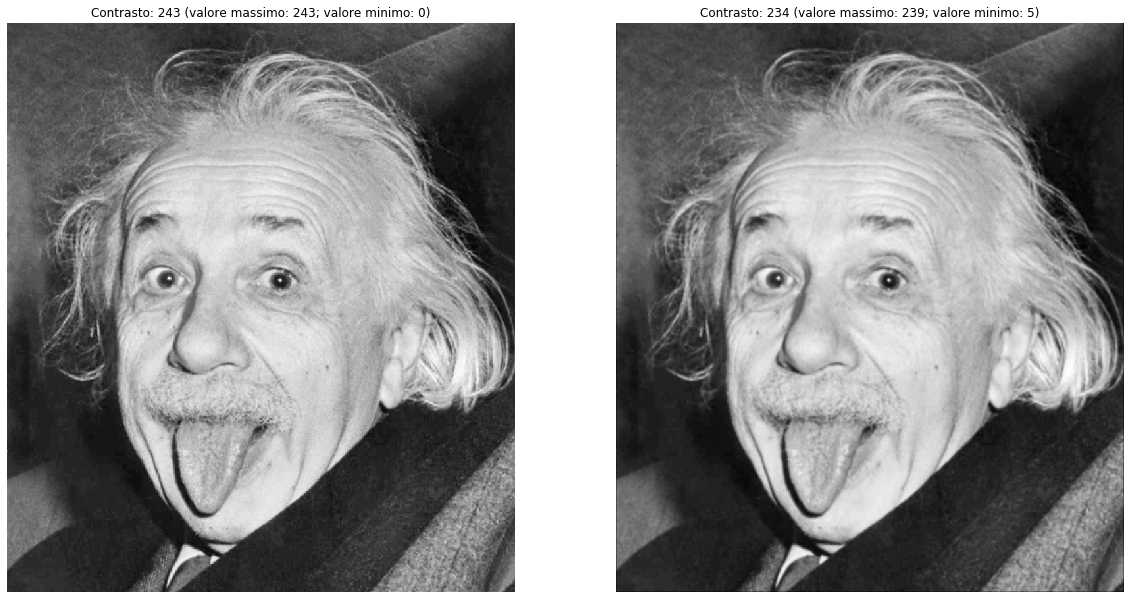

In [5]:
k = np.full((3,3),1.0/9.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve2d(image,k)

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()

Proviamo a fare uno zoom e vedere i dettagli

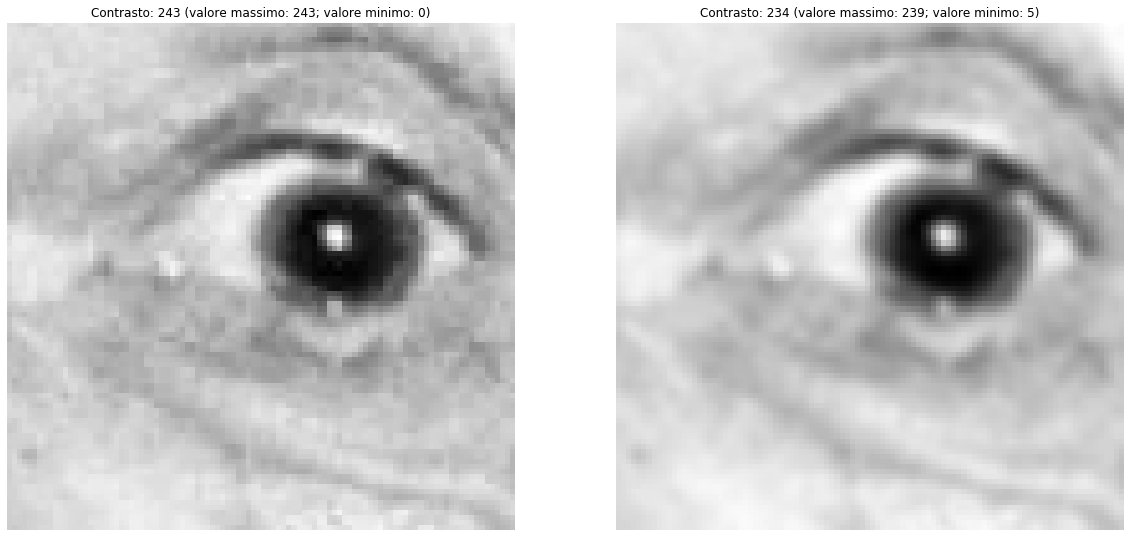

In [6]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image[350:450,350:450],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve2d(image,k)

fig.add_subplot(1, 2, 2) 
plt.imshow(out[350:450,350:450],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()

Allarghiamo il filtro

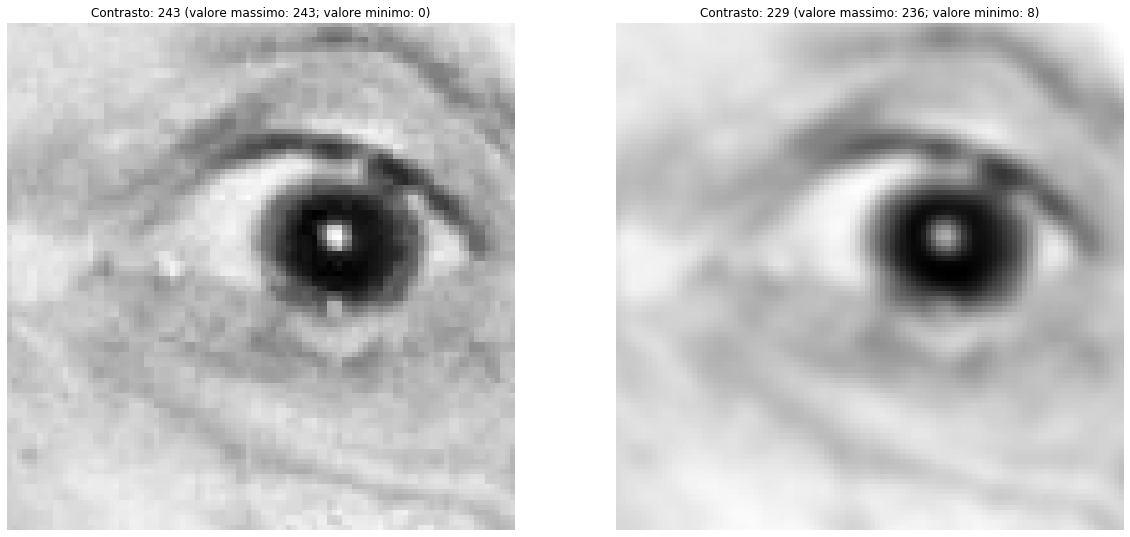

In [7]:
k = np.full((5,5),1.0/25.0)


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image[350:450,350:450],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve2d(image,k)

fig.add_subplot(1, 2, 2) 
plt.imshow(out[350:450,350:450],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()

La funzione che stiamo analizzando è un lenta. (riuscite a dire perché?). `SciPy`mette a disposizione una funzione predefinita molto più efficiente. 



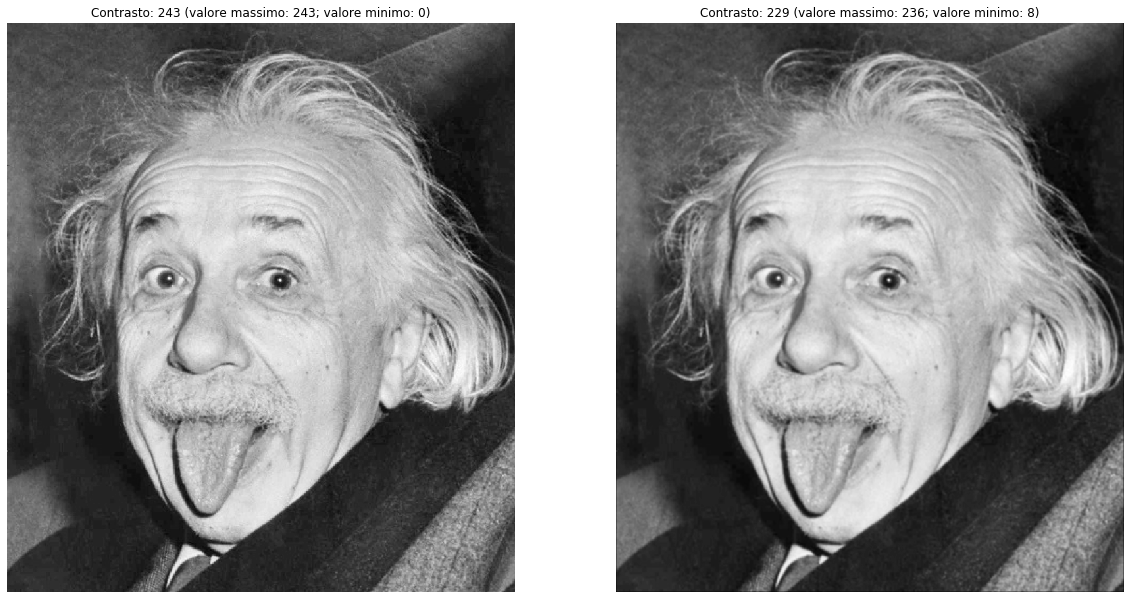

In [8]:
k = np.full((3,3),1.0/9.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(convolve(image,k,mode='constant', cval=0.0),cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()

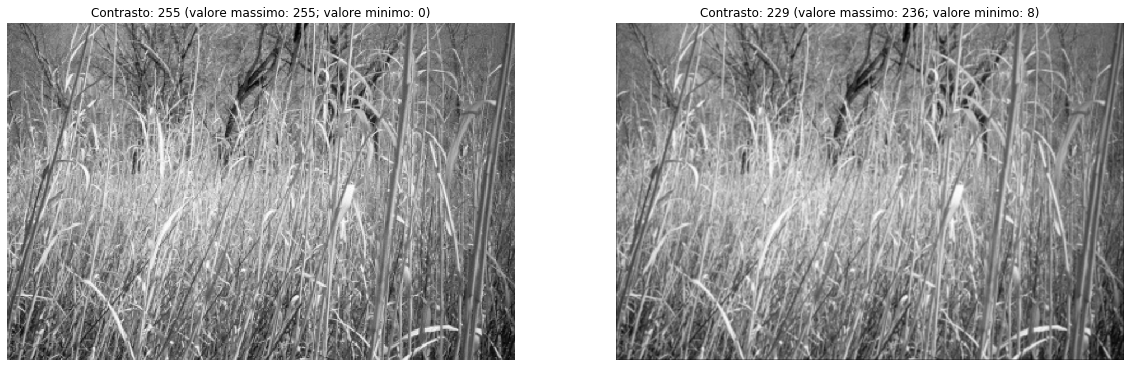

In [9]:
image = mp_image.imread(os.path.join(img_src,'prato.png'))[:,:,0]
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(convolve(image,k,mode='constant', cval=0.0),cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()



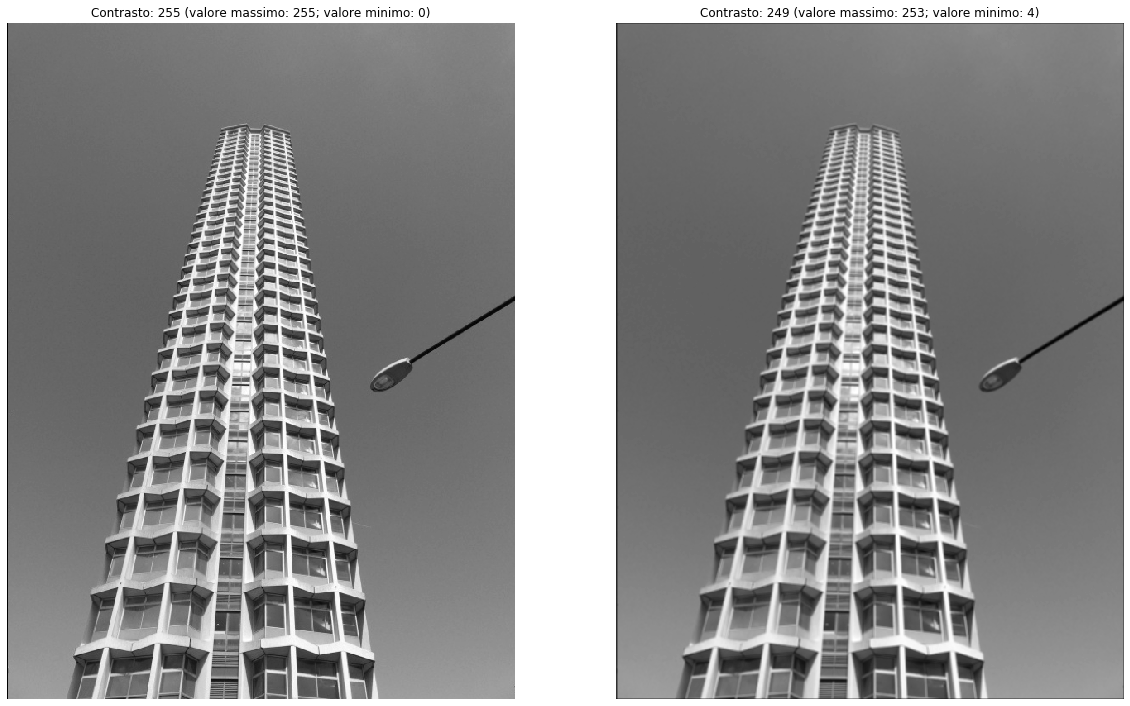

In [10]:
image = mp_image.imread(os.path.join(img_src,'grattacielo.png'))[:,:,0]

out = convolve(image,k,mode='constant', cval=0.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()



Proviamo ad ampliare il range: 

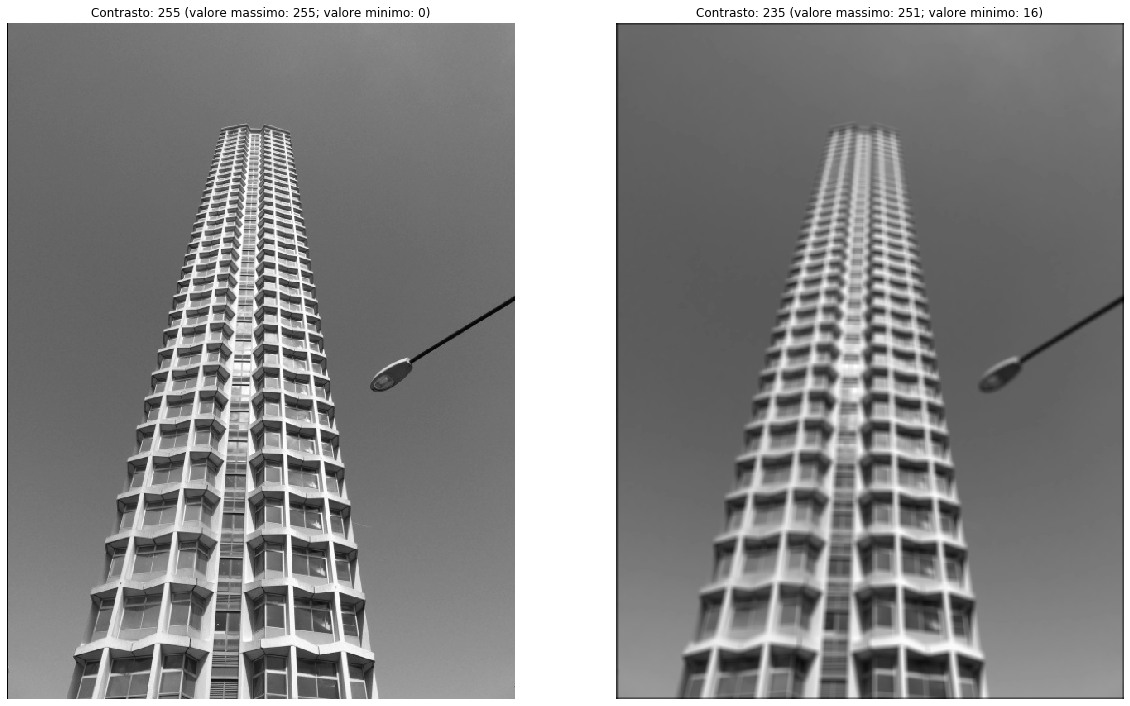

In [11]:
k = np.full((7,7),1.0/49.0)

image = mp_image.imread(os.path.join(img_src,'grattacielo.png'))[:,:,0]

out = convolve(image,k,mode='constant', cval=0.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()




Proviamo con un filtro gaussiano. 

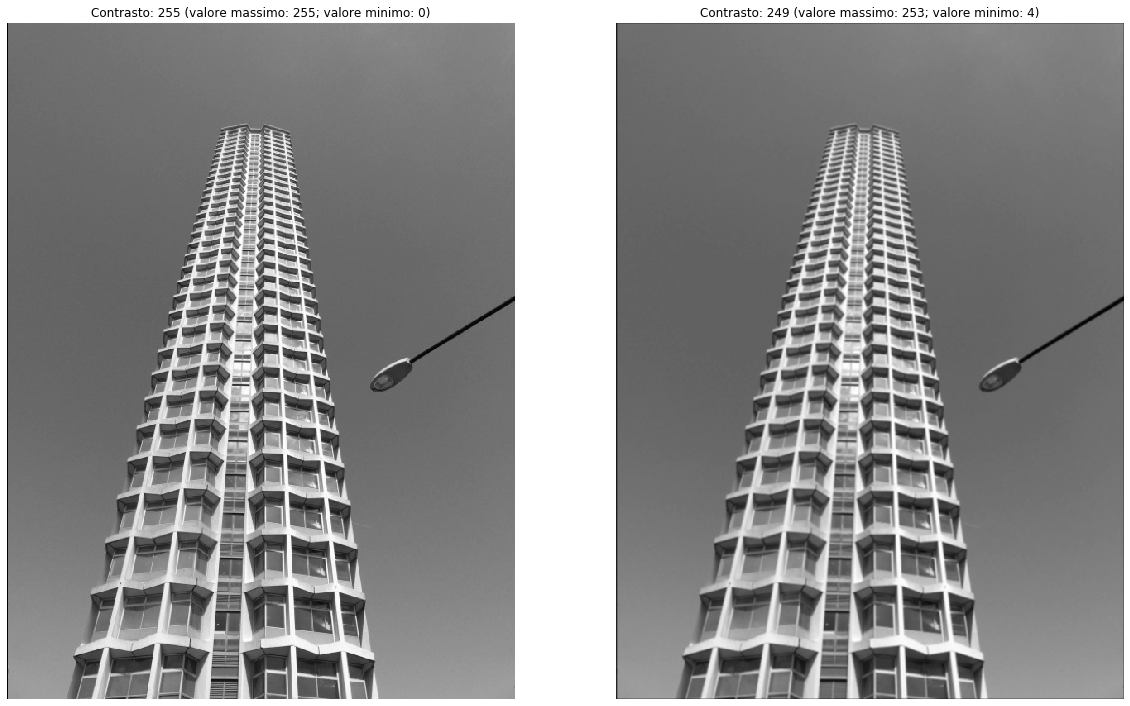

In [12]:
k = 1/16.0*np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
]).astype(np.float32)

image = mp_image.imread(os.path.join(img_src,'grattacielo.png'))[:,:,0]

out = convolve(image,k,mode='constant', cval=0.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()

